In [1]:
from konlpy.tag import Okt
okt = Okt()

# 예제 텍스트
text = "이것은 자연어 처리를 위한 한글 텍스트입니다. 텍스트를 분석하고 처리합니다."

# 텍스트 토큰화
tokens = okt.morphs(text)

# 불용어 리스트 정의
stopwords = ['이것', '텍스트', '위한']

# 불용어 제거
tokens_without_stopwords = [word for word in tokens if not word in stopwords]

print("원본 텍스트 토큰:", tokens)
print("불용어 제거 후 토큰:", tokens_without_stopwords)


원본 텍스트 토큰: ['이', '것', '은', '자연어', '처리', '를', '위', '한', '한글', '텍스트', '입니다', '.', '텍스트', '를', '분석', '하고', '처리', '합니다', '.']
불용어 제거 후 토큰: ['이', '것', '은', '자연어', '처리', '를', '위', '한', '한글', '입니다', '.', '를', '분석', '하고', '처리', '합니다', '.']


In [2]:
import MeCab
m = MeCab.Tagger()
m.parse("안녕하세요. 테스트 입니다요.")

'안녕\tNNG,행위,T,안녕,*,*,*,*\n하\tXSV,*,F,하,*,*,*,*\n세요\tEP+EF,*,F,세요,Inflect,EP,EF,시/EP/*+어요/EF/*\n.\tSF,*,*,*,*,*,*,*\n테스트\tNNG,행위,F,테스트,*,*,*,*\n입니다요\tVCP+EF,*,F,입니다요,Inflect,VCP,EF,이/VCP/*+ᄇ니다요/EF/*\n.\tSF,*,*,*,*,*,*,*\nEOS\n'

In [9]:
from konlpy.tag import Mecab 
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")
text = """사실 저 USSBaltimore가 저였습니다.. 저때 당시 무료로 풀릴 당시라 유입이 많이 있었는데 꽤 그립네요... 지금은 한국인은 아예 없을뿐더러 다들 라이더스 리퍼블릭으로 넘어가셧지만 스팁만의 배경과 라이더스 리퍼블릭만의 조작감 이슈로 저는 라이더스 리퍼블릭보단 스팁을 아직도 플레이 중입니다 덕분에 저때 당시 52렙이었지만 현재전 100레벨 이상을 넘게 찍어서 한국인중 최후의 썩은물이 되어버렸네요.. 저때 당시 제가 영어만 쓰는 컨셉질을 많이해서 다른 분들에게 다가가 접근해 한국인분들이랑 재밋게 놀고 있었답니다"""
morphs = mecab.morphs(text)
pos = mecab.pos(text)
nouns = mecab.nouns(text)

print('mecab check :', morphs)
print('mecab check :', pos)
print('mecab check :', nouns)

mecab check : ['사실', '저', 'USSBaltimore', '가', '저', '였', '습니다', '.', '.', '저', '때', '당시', '무료', '로', '풀릴', '당시', '라', '유입', '이', '많이', '있', '었', '는데', '꽤', '그립', '네요', '.', '..', '지금', '은', '한국인', '은', '아예', '없', '을', '뿐', '더러', '다', '들', '라이더', '스', '리퍼블릭', '으로', '넘어가', '셧', '지만', '스', '팁', '만', '의', '배경', '과', '라이더', '스', '리퍼블릭', '만', '의', '조작', '감', '이슈', '로', '저', '는', '라이더', '스', '리퍼블릭', '보단', '스', '팁', '을', '아직', '도', '플레이', '중', '입니다', '덕분', '에', '저', '때', '당시', '52', '렙', '이', '었', '지만', '현재', '전', '100', '레벨', '이상', '을', '넘', '게', '찍', '어서', '한국인', '중', '최후', '의', '썩', '은', '물', '이', '되', '어', '버렸', '네요', '.', '.', '저', '때', '당시', '제', '가', '영어', '만', '쓰', '는', '컨셉', '질', '을', '많이', '해서', '다른', '분', '들', '에게', '다가가', '접근', '해', '한국인', '분', '들', '이랑', '재', '밋', '게', '놀', '고', '있', '었', '답니다']
mecab check : [('사실', 'MAG'), ('저', 'MM'), ('USSBaltimore', 'SL'), ('가', 'JKS'), ('저', 'NP'), ('였', 'VCP+EP'), ('습니다', 'EF'), ('.', 'SF'), ('.', 'SY'), ('저', 'MM'), ('때', 'NNG'), ('당시', 'N

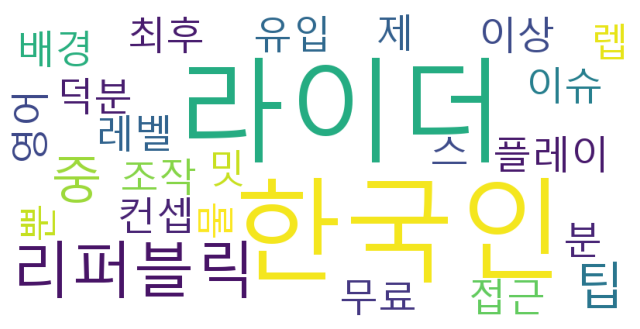

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# mecab 처리 텍스트
stopwords = ['저', '때', '당시', '지금']

# 불용어 제거
filtered_nouns = [word for word in nouns if word not in stopwords]

# 명사 리스트를 하나의 문자열로 합치기
text = " ".join(filtered_nouns)

# 워드 클라우드 객체 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
    background_color='white',  # 배경색
    max_words=200,  # 최대 단어 수
    width=800, height=400  # 크기
).generate(text)

# 워드 클라우드 시각화
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

마스크 이미지 변경

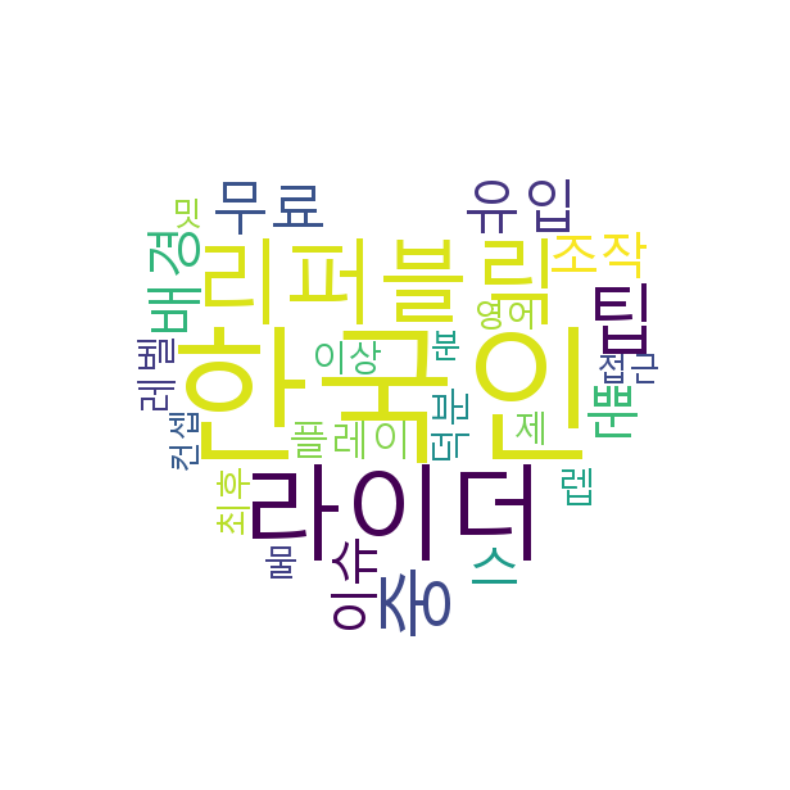

In [45]:
from PIL import Image, ImageOps
import numpy as np

# 이미지 로드
image_path = 'mask1.jpg'
image = Image.open(image_path)

# 이미지 반전 - 필요할 경우 실행
image = ImageOps.invert(image)

# 반전된 이미지를 배열로 변환
mask1 = np.array(image)

# 워드 클라우드 객체 생성
wordcloud = WordCloud(
    mask=mask1,
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
    background_color='white',  # 배경색
    max_words=200,  # 최대 단어 수
    width=800, height=400  # 크기
).generate(text)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

컬러 스타일 변경해보기

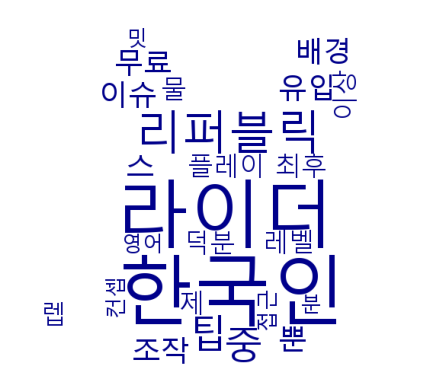

In [50]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 이미지로부터 색상 생성
image = np.array(Image.open("mask2.png"))
color_generator = ImageColorGenerator(image)

# 워드 클라우드 객체 생성
wordcloud = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
    color_func=lambda *args, **kwargs: "darkblue", # 모든 단어를 진한 파란색으로 바꾸기
    background_color='white',
    mask=image,  # 이미지 모양의 마스크 사용
    # color_func=color_generator,  # 이미지 색상에 기반한 색상 사용
).generate(text)

# 워드 클라우드 시각화
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
